# Homework Assignment 1
__Xiaoxiong Xu__  
__PSTAT 134__  
__April 11, 2018__  

## Simulation of Markov Chain

We will simulate an irreducible Markov Chain, which means we start at each state in the chain and it will return back to itself with non-zero probability. Suppose we have state space $\mathbb{M} = \{,...,9\}$. Then, we can create a $9 \times 9$ Markov Chain Matrix: 

$$\begin{bmatrix}
    p_{1,1} & p_{1,2} & \dots & p_{1,9} \\
    p_{2,1} & p_{2,2} & \dots & x_{2,9} \\
    \vdots  & \vdots  & \ddots& \vdots \\
    p_{9,1} & p_{9,2} &\dots & p_{5,9}
\end{bmatrix}$$

where $p_{i,j}$ is the probability that starts in $S_i$ to $S_j$ for all $i,j \in \mathbb{M}$, and $p_{i,j} \in [0,1]$. We can also easily consider row as the state you start, and the columns are the states you can get to.

In [194]:
import numpy as np
import random

def Markov_Matrix(t):
    n = max(t) + 1 #number of states

    p = np.empty((n,n,)); p.fill(0)

    for (i,j) in zip(t,t[1:]):
        p[i][j] += 1

    #convert to probabilities:
    for row in p:
        total = sum(row)
        if total > 0:
            row[:] = [x/total for x in row]
    return p

transitions = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
matrix = Markov_Matrix(transitions)
matrix = np.asmatrix(matrix)
matrix.shape

(9, 9)

In [195]:
matrix

matrix([[ 0.66666667,  0.33333333,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.5       ,  0.125     ,  0.125     ,  0.25      ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.5       ,  0.5       ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.2       ,  0.        ,  0.        ,  0.2       ,
          0.6       ,  0.        ,  0.        ,  0.        ],
        [ 0.16666667,  0.16666667,  0.        ,  0.        ,  0.16666667,
          0.33333333,  0.        ,  0.16666667,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  1.        ],
        [ 0.        ,  0.        ,  0.        , 

In [196]:
# create a array with all zero, and set the second element to 1.0.
vector = np.empty((1,9,)); vector.fill(0)
vector[0,][1] = 1
vector

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [197]:
vector = np.asmatrix(vector)
vector

matrix([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

By using the Markov property: only the last state influences the next state
$$p_{ij} = Pr\{S_{n+1} = j | S_n = i, S_{n-1} = a, ..., S_0 = z\} = Pr\{S_{n+1} = j | S_n = i\} = vector \times matrix^n$$


In [198]:
prob = []
for i in range(50):
    p = vector * matrix ** i
    prob.append(np.array(p).flatten())

prob = np.array(prob)

In [199]:
prob

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.5       ,  0.125     ,  0.125     ,  0.25      ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.3       ,  0.0625    ,  0.125     ,  0.2375    ,
         0.15      ,  0.125     ,  0.        ,  0.        ],
       [ 0.025     ,  0.2225    ,  0.0375    ,  0.1       ,  0.21      ,
         0.1925    ,  0.0625    ,  0.025     ,  0.125     ],
       [ 0.04875   ,  0.23533333,  0.0278125 ,  0.0778125 ,  0.17970833,
         0.23183333,  0.0375    ,  0.03208333,  0.12916667],
       [ 0.07113889,  0.25155278,  0.02941667,  0.06832292,  0.17232014,
         0.22815833,  0.0278125 ,  0.03863889,  0.11263889],
       [ 0.08545231,  0.25952606,  0.0314441 ,  0.06560556,  0.16954007,
         0.21699116,  0.02941667,  0.03802639,  0.10399769],
       [ 0.0931334 ,  0.26298624,  0.03244076,  0.06524354,  0

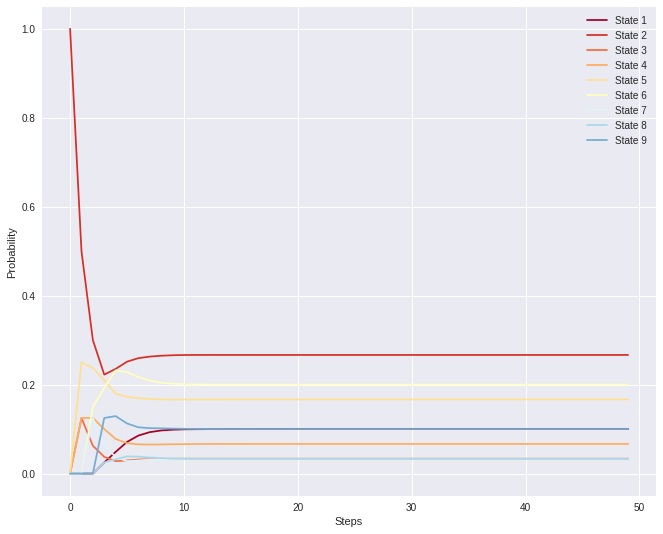

In [200]:
%matplotlib inline
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.xlabel('Steps')
plt.ylabel('Probability')
list = []
for i in range(9):
    data, = plt.plot(prob[:, i], color = plt.cm.RdYlBu(i/10), label="State %i" % (i+1))
    list.append(data)
plt.legend(handles=list, loc=1)
plt.show()

According to the plot, we notice that the Markov Chain has reached stationary distribution after 15 steps, and $S_2$ has the highest probaiblity.

In [10]:
import random
import numpy

M=numpy.zeros((52,52),dtype=int)
z=0
State_Space=[]

for i in range(1,100):
    x=random.randint(1,50)
    y=random.randint(1,50)

    T=M.copy()
    if T[x][y]==1:
        T[x][y]=0
    if T[x][y]==0:
        T[x][y]=1

    if not any(numpy.array_equal(T, X) for X in State_Space):
        if T[x+1][y+1]==0 and T[x+1][y-1]==0 and T[x-1][y-1]==0 and T[x-1][y+1]==0:
            State_Space.append(T)
            M=T
    else:
        if T[x+1][y+1]==0 and T[x+1][y-1]==0 and T[x-1][y-1]==0 and T[x-1][y+1]==0:
            M=T
print(len(State_Space))

93


In [4]:
import numpy as np 
import random

N=100000
a=np.random.rand(N)
b=np.random.rand(N)
c=(a**2+b**2)**(1/2)

for i in range(len(c)):
    if c[i]>1:
        c[i]=0
    else:
        c[i]=1

d=np.sum(c)
pi=(d/N)*4
print(pi)

3.13892
